### $$ Analyste :\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; Jeff\; Lwear \;DUVERSEAU$$

# Project Title : Analyse pr√©dictive de l'√©tat des points d'eau en Tanzanie


## Overview

Probl√®me : En Tanzanie, plus de 57 millions de personnes d√©pendent des pompes √† eau, mais beaucoup sont en panne ou n√©cessitent des r√©parations.

Objectif : Concevoir un mod√®le d‚Äôapprentissage automatique (machine learning) pour pr√©dire l‚Äô√©tat de fonctionnement des pompes (fonctionnelle / n√©cessite une r√©paration / non fonctionnelle).

Parties prenantes :

- ONG ‚Üí prioriser les r√©parations

- Gouvernement ‚Üí am√©liorer la planification des nouvelles infrastructures hydrauliques

Impact : Meilleure allocation des ressources ‚Üí acc√®s plus fiable √† l‚Äôeau potable.

## Business Understanding

- Parties prenantes :

   - ONG et organisations d‚Äôaide humanitaire

   - Gouvernement tanzanien et autorit√©s locales

   - Communaut√©s rurales

- Probl√®me m√©tier :

  - Des milliers de pompes √† eau rurales tombent en panne chaque ann√©e.

  - Ressources limit√©es ‚Üí impossible de r√©parer rapidement toutes les pompes.

  - Besoin d‚Äôun syst√®me pr√©dictif pour d√©cider : Quelles pompes doivent √™tre inspect√©es ou r√©par√©es en priorit√© ?

- Objectif :
  - Utiliser l‚Äôapprentissage automatique pour classer les pompes en :

    - Fonctionnelle
    - N√©cessite une r√©paration
    - Non fonctionnelle

- Valeur m√©tier :

  - Meilleure allocation des √©quipes de r√©paration
  - Augmentation de l‚Äôacc√®s √† l‚Äôeau potable
  - R√©duction des co√ªts et am√©lioration de la prise de d√©cision

## Libraries Importation

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
# Charger les datasets
df_Training_set_values = pd.read_csv('Training_set_values.csv')
df_Training_set_labels = pd.read_csv('Training_set_labels.csv')
df_Test_set_values = pd.read_csv('Test_set_values.csv')


In [3]:
# Exploration des donnees
df_Training_set_values.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   
2                   dam                   dam       surface   
3           machine dbh              borehole   groundwater   
4  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [4]:
df_Training_set_labels.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [5]:
df_Test_set_values.head()

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

   ... payment_type water_quality quality_group      quantity  quantity_group  \
0  ...    never pay          soft          good      seasonal        seasonal   
1  ...    never pay          soft          good  insufficient    insufficient   
2  ...    never pay          soft          good  insufficient    insufficient   
3  ...      unknown          soft          good           dry             dry   
4  ...      monthly          soft          good        enough          enough   

                 source           source_type  source_class  \
0  rainwater harvesting  rainwater harvesting       surface   
1                spring                spring   groundwater   
2  rainwater harvesting  rainwater harvesting       surface   
3          shallow well          shallow well   groundwater   
4                spring                spring   groundwater   

      waterpoint_type waterpoint_type_group  
0               other                 other  
1  communal standpipe    communal standpipe  
2               other                 other  
3               other                 other  
4  communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [6]:
df_Test_set_values.shape

(14850, 40)

## Comment:
- Training_set_values : contient les variables explicatives pour l‚Äôentra√Ænement.
- Training_set_labels : contient la variable cible status_group pour chaque ligne de training_set_values.
- Test_set_values : contient les m√™mes variables explicatives que l‚Äôensemble d‚Äôentra√Ænement, pour lesquelles nous devons pr√©dire status_group.


In [7]:
# Informations g√©n√©rales sur les colonnes, types de donn√©es, valeurs manquantes
df_Training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Overview of the dataset
Le jeu de donn√©es contient 59 400 lignes et 40 colonnes de variables explicatives.

- Types de donn√©es vari√©s :

  - Int64 et float64 pour les valeurs num√©riques (ex. : amount_tsh, gps_height, population).

  - Object pour les variables cat√©gorielles (ex. : installer, funder, region).

- Valeurs manquantes : certaines colonnes pr√©sentent des donn√©es absentes :

  - funder : 55 763 valeurs non nulles sur 59 400

  - installer : 55 745 valeurs non nulles

  - subvillage : 59 029 valeurs non nulles

  - scheme_name : 30 590 valeurs non nulles (beaucoup de valeurs manquantes)

  - public_meeting, permit, scheme_management pr√©sentent √©galement des valeurs manquantes.

In [8]:
# V√©rifier le nombre de doublons dans id
print("Doublons d'ID :", df_Training_set_values['id'].duplicated().sum())

Doublons d'ID : 0


## Comment
Le dataset ne contient aucun doublon.

## Data Preparation

Cette √©tape consiste √† pr√©parer le jeu de donn√©es pour l‚Äôentra√Ænement du mod√®le (nettoyage, encodage, traitement des valeurs manquantes).

## Comment: 
En classification supervis√©e, plus on a de variables redondantes ou bruit√©es, plus le mod√®le risque :

- de surcharger l‚Äôapprentissage (overfitting),

- d‚Äôintroduire des corr√©lations inutiles qui biaisent la pr√©diction,

- et de ralentir le traitement.

## Choix des variables
Localisation & contexte

- funder ‚Üí Qui a financ√© le puits, peut influencer la qualit√© et la durabilit√©.

- installer ‚Üí Organisation ayant construit le puits (qualit√© des travaux).

- gps_height, longitude, latitude ‚Üí Indications g√©ographiques et environnementales.

- basin, region, subvillage ‚Üí Contexte g√©ographique et hydrographique (zone + climat).

Gestion & exploitation

- public_meeting ‚Üí Participation communautaire (impact sur l‚Äôentretien).

- recorded_by ‚Üí Source de collecte (utile pour d√©tection de biais).

- scheme_management ‚Üí Mode de gestion du point d‚Äôeau.

- permit ‚Üí L√©galisation ou autorisation, peut jouer sur fiabilit√©.


Construction & maintenance

- construction_year ‚Üí √Çge du puits, impact direct sur √©tat de fonctionnement.

- extraction_type ‚Üí Type de pompe/extraction utilis√©.

Caract√©ristiques de l‚Äôeau

- payment ‚Üí Mode de paiement (induit un investissement de la communaut√©).

- water_quality ‚Üí Qualit√© de l‚Äôeau.

- quantity ‚Üí Disponibilit√© de l‚Äôeau (suffisante, s√®che, faible, etc.).

- source ‚Üí Source d‚Äôapprovisionnement (rivi√®re, nappe souterraine, etc.).

- waterpoint_type ‚Üí Type de point d‚Äôeau (puits prot√©g√©, standpipe, etc.).

Variables supprim√©es

- amount_tsh : d√©j√† refl√©t√© par quantity, souvent bruit√© et peu discriminant.

- population : trop bruit√©e, corr√©l√©e √† quantity.

- region_code, district_code, lga, ward, etc. : informations d√©j√† contenues dans region et basin.

- water_quality_group, quantity_group, extraction_type_group, etc. : doublons g√©n√©ralis√©s des colonnes d√©j√† gard√©es (water_quality, quantity, extraction_type).

- num_private, wpt_name, scheme_name, recorded_by : identifiants ou texte libre trop sp√©cifique.

## Cr√©ation d'une nouvelle variable age du puits (well_age)

In [9]:
df_Training_set_values["construction_year"].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [10]:
zero_count = (df_Training_set_values["construction_year"] == 0).sum()
print("Nombre de valeurs = 0 :", zero_count)
print("Proportion :", zero_count / len(df_Training_set_values) * 100, "%")

Nombre de valeurs = 0 : 20709
Proportion : 34.86363636363636 %


## Comment
On a donc 34,9 % de construction_year = 0 ‚Üí ce sont en r√©alit√© des valeurs manquantes d√©guis√©es.

## Strat√©gie de traitement: Imputation par la m√©diane (robuste aux outliers)

In [11]:
# Calculer la m√©diane des ann√©es NON nulles (‚â†0)
median_year = df_Training_set_values[df_Training_set_values["construction_year"] != 0]["construction_year"].median()

In [12]:
median_year

2000.0

In [13]:
# Remplacer les 0 par la m√©diane
df_Training_set_values["construction_year_imputed"] = df_Training_set_values["construction_year"].replace(0, median_year)

In [14]:
zero_count = (df_Training_set_values["construction_year_imputed"] == 0).sum()
print("Nombre de valeurs = 0 :", zero_count)
print("Proportion :", zero_count / len(df_Training_set_values) * 100, "%")

Nombre de valeurs = 0 : 0
Proportion : 0.0 %


In [15]:
## calculer l'√¢ge du puits (well_age)
df_Training_set_values['date_recorded'] = pd.to_datetime(df_Training_set_values['date_recorded'])
record_year = df_Training_set_values['date_recorded'].dt.year

# Calculer l'√¢ge
df_Training_set_values['well_age'] = record_year - df_Training_set_values['construction_year_imputed']

# G√©rer les √¢ges n√©gatifs (au cas o√π l'imputation aurait cr√©√© des ann√©es futures)
df_Training_set_values['well_age'] = df_Training_set_values['well_age'].clip(lower=0) # Met toutes les valeurs n√©gatives √† 0

# Afficher le r√©sultat
print(df_Training_set_values['well_age'].head(10))

0    12
1     3
2     4
3    27
4    11
5     2
6    12
7    12
8    12
9    11
Name: well_age, dtype: int64


## Verifions les donnees de test

In [16]:
zero_count1 = (df_Test_set_values["construction_year"] == 0).sum()
print("Nombre de valeurs = 0 :", zero_count)
print("Proportion :", zero_count / len(df_Test_set_values) * 100, "%")

Nombre de valeurs = 0 : 0
Proportion : 0.0 %


## Comment: 
les donnees de test ne presentent pas de valeurs manquantes d√©guis√©es, on peut proceder au calcul de l'age de puits

In [17]:
df_Test_set_values['date_recorded'] = pd.to_datetime(df_Test_set_values['date_recorded'])
record_year = df_Test_set_values['date_recorded'].dt.year

# Calculer l'√¢ge
df_Test_set_values['well_age'] = record_year - df_Test_set_values['construction_year']

# Afficher le r√©sultat
print(df_Test_set_values['well_age'].head(10))

0     1
1    13
2     3
3    26
4    13
5    23
6     4
7    31
8    16
9    10
Name: well_age, dtype: int64


## Fusion de training_set_values et training_set_labels

In [18]:
# Clone des datasets en conservant l'id
df_train_values_clone = df_Training_set_values.copy()
df_train_labels_clone = df_Training_set_labels.copy()

# Fusion sur id pour avoir valeurs + cible dans un seul DataFrame
df = df_train_values_clone.merge(
    df_train_labels_clone, 
    on="id", 
    how="left"
)

## Selection des variables pertinentes pour la modelisation

In [19]:
# Colonnes retenues pour la mod√©lisation
selected_columns_train = [
    "funder",
    "gps_height",
    "installer",
    "longitude",
    "latitude",
    "basin",
    "subvillage",
    "region",
    "public_meeting",
    "scheme_management",
    "permit",
    "well_age",
    "extraction_type",
    "payment",
    "water_quality",
    "quantity",
    "source",
    "status_group",
    "waterpoint_type"
]

df_Select = df[selected_columns_train].copy()

In [20]:
df_Select.shape

(59400, 19)

## Comment:
En r√©sum√©, on passe de 41 colonnes √† 19 colonnes plus pertinentes, ce qui permet un mod√®le plus :
- simple √† entra√Æner
- rapide en calcul
- moins biais√© par le bruit

## Test_set_values

In [21]:
# Colonnes retenues pour la mod√©lisation
selected_columns_test = [
    "funder",
    "gps_height",
    "installer",
    "longitude",
    "latitude",
    "basin",
    "subvillage",
    "region",
    "public_meeting",
    "scheme_management",
    "permit",
    "well_age",
    "extraction_type",
    "payment",
    "water_quality",
    "quantity",
    "source",
    "waterpoint_type",
]

df_test = df_Test_set_values[selected_columns_test].copy()

In [22]:
df_test.shape

(14850, 18)

## Cleaning Sets

In [23]:
# V√©rification des valeurs manquantes (train)
missing_values = df_Select.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

scheme_management    3878
installer            3655
funder               3637
public_meeting       3334
permit               3056
subvillage            371
dtype: int64


## Traitement des valeurs manquantes

In [24]:
# Cat√©gorielles textuelles ‚Üí remplacer par "Unknown"
cols_unknown = ["funder", "installer", "scheme_management", "subvillage"]
for col in cols_unknown:
    df_Select[col] = df_Select[col].fillna("Unknown")
    df_test[col] = df_test[col].fillna("Unknown")

# Bool√©ennes ‚Üí garder une cat√©gorie "Unknown"
bool_cols = ["public_meeting", "permit"]
for col in bool_cols:
    df_Select[col] = df_Select[col].fillna("Unknown")
    df_test[col] = df_test[col].fillna("Unknown")

# V√©rification apr√®s imputation
print("Valeurs manquantes restantes (train):")
print(df_Select.isnull().sum().sum())
print("\nValeurs manquantes restantes (test):")
print(df_test.isnull().sum().sum())

Valeurs manquantes restantes (train):
0

Valeurs manquantes restantes (test):
0


In [25]:
df_Select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   funder             59400 non-null  object 
 1   gps_height         59400 non-null  int64  
 2   installer          59400 non-null  object 
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   basin              59400 non-null  object 
 6   subvillage         59400 non-null  object 
 7   region             59400 non-null  object 
 8   public_meeting     59400 non-null  object 
 9   scheme_management  59400 non-null  object 
 10  permit             59400 non-null  object 
 11  well_age           59400 non-null  int64  
 12  extraction_type    59400 non-null  object 
 13  payment            59400 non-null  object 
 14  water_quality      59400 non-null  object 
 15  quantity           59400 non-null  object 
 16  source             594

## Encodage des variables

In [26]:
# Harmonisation bool√©ens

bool_cols = ["public_meeting", "permit"]

for col in bool_cols:
    df_Select[col] = df_Select[col].map({True: "Yes", False: "No"})
    df_Select[col] = df_Select[col].map({True: "Yes", False: "No"})



In [27]:
#  D√©finir numeric/categorical features
numeric_features = ["gps_height", "longitude", "latitude", "well_age"]
categorical_features = [col for col in df_Select.columns if col not in numeric_features + ["status_group"]]


In [28]:
#  Cr√©er le pr√©processeur
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [29]:
# Transformation Train

X_train_transformed = preprocessor.fit_transform(df_Select.drop("status_group", axis=1))

# Encodage de la cible
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_Select["status_group"])

print("Classes cibles:", label_encoder.classes_)
print("Train shape (sparse):", X_train_transformed.shape)

Classes cibles: ['functional' 'functional needs repair' 'non functional']
Train shape (sparse): (59400, 23432)


In [30]:
# 4. Transformer test
X_test_transformed = preprocessor.transform(df_test)

print("Train shape:", X_train_transformed.shape)
print("Test shape:", X_test_transformed.shape)

Train shape: (59400, 23432)
Test shape: (14850, 23432)


## EXPLORATORY DATA ANALYSIS (EDA)

## Comment 
X_train_transformed est une matrice encod√©e et standardis√©e (sparse matrix de 23 432 colonnes apr√®s one-hot encoding).
Faire de l‚ÄôEDA directement dessus n‚Äôa pas beaucoup de sens (les variables sont √©clat√©es en dizaines de milliers de colonnes binaires).

L‚ÄôEDA va √™tre faite sur les variables d‚Äôorigine avant transformation (df_Select) pour garder l‚Äôinterpr√©tabilit√©.

## Distribution des classes (Analyse de la variable cible)

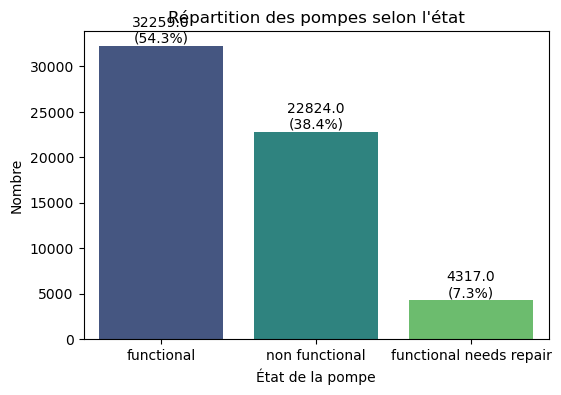

In [31]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_Select, x="status_group", palette="viridis")

# Ajouter les pourcentages sur les barres
total = len(df_Select)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("R√©partition des pompes selon l'√©tat")
plt.xlabel("√âtat de la pompe")
plt.ylabel("Nombre")
plt.show()

## Comment
## Analyse de la variable cible

La majorit√© des points d‚Äôeau sont fonctionnels (54.3%).

Une proportion importante (38.4%) est non fonctionnelle, ce qui reste pr√©occupant.

Seule une minorit√© (7.3%) est class√©e functional needs repair, ce qui montre un fort d√©s√©quilibre entre les classes.

Cette distribution d√©s√©quilibr√©e est importante √† garder en t√™te, car elle peut biaiser les mod√®les de classification qui auront tendance √† mieux pr√©dire les classes majoritaires (‚Äúfunctional‚Äù et ‚Äúnon functional‚Äù) au d√©triment de la classe minoritaire (‚Äúneeds repair‚Äù).

## Correlation entre target est les variables numeriques

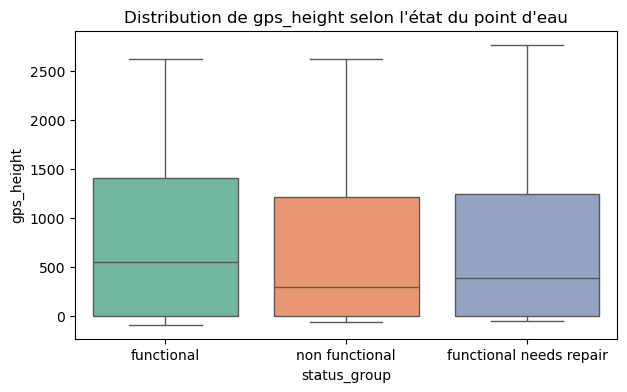

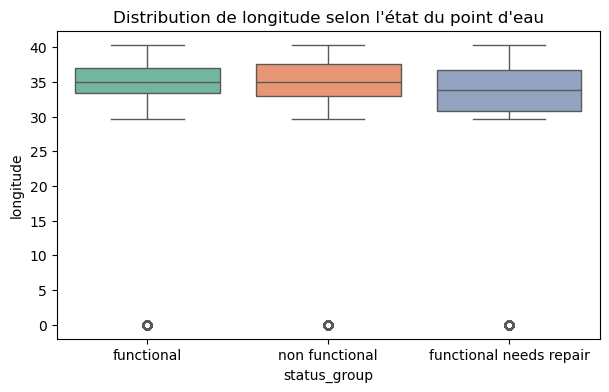

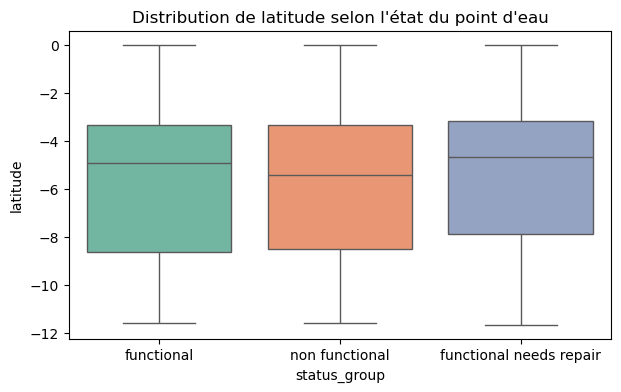

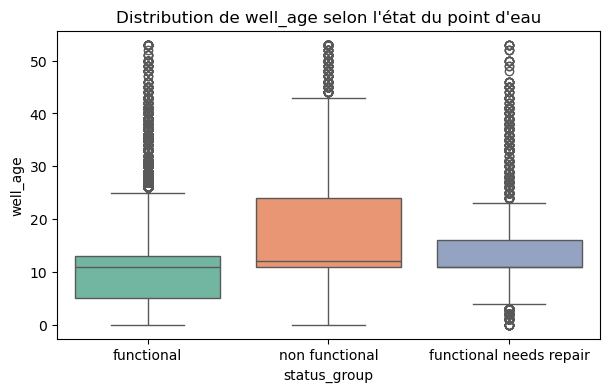

In [32]:
num_vars = ["gps_height", "longitude", "latitude", "well_age"]

for col in num_vars:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df_Select, x="status_group", y=col, palette="Set2")
    plt.title(f"Distribution de {col} selon l'√©tat du point d'eau")
    plt.show()

## Comment

## Distribution de gps_height selon l‚Äô√©tat du point d‚Äôeau

Functional (vert) : la m√©diane est plus √©lev√©e (~500 m). La distribution est large, avec de nombreux points en altitude (jusqu‚Äô√† >2500 m).

Non functional (orange) : m√©diane plus basse (~300 m). Beaucoup de pompes en panne semblent situ√©es √† des altitudes plus faibles.

Functional needs repair (bleu) : m√©diane proche de 400 m, un peu plus que les pompes non fonctionnelles.

Interpr√©tation :
Il semble y avoir une tendance : les pompes en altitude (gps_height plus √©lev√©) sont plus souvent fonctionnelles que celles situ√©es en basse altitude.
Cela peut √™tre li√© √† des conditions g√©ographiques (zones montagneuses mieux drain√©es, moins d‚Äôinondations, ou meilleures infrastructures).


## Distribution de longitude selon l‚Äô√©tat du point d‚Äôeau

Les trois groupes (functional, non functional, functional needs repair) ont des distributions assez proches.

Les m√©dianes se situent toutes autour de 34‚Äì36¬∞.

Interpr√©tation :
La longitude n‚Äôa pas de pouvoir discriminant clair pour diff√©rencier l‚Äô√©tat du point d‚Äôeau.
Les distributions se chevauchent beaucoup, donc cette variable seule n‚Äôexplique pas l‚Äô√©tat des pompes.

## Distribution de well_age selon l'√©tat du point d'eau
functional (vert)
La m√©diane de well_age est autour de ~11-12 ans.

non functional (orange)
La m√©diane est plus √©lev√©e que pour le groupe ¬´ functional ¬ª, autour de ~20‚Äì22 ans.

functional needs repair (bleu)
M√©diane autour de ~12‚Äì14 ans (un peu plus √©lev√©e que le groupe ¬´ functional ¬ª mais moins que ¬´ non functional ¬ª).

Le groupe non functional pr√©sente une m√©diane d‚Äô√¢ge plus √©lev√©e et une plus grande variabilit√©, ce qui peut sugg√©rer que les puits plus √¢g√©s ont plus de probabilit√©s d‚Äô√™tre non fonctionnels.

Les groupes functional et functional needs repair montrent des √¢ges plus jeunes en moyenne, mais ¬´ functional needs repair ¬ª a une distribution l√©g√®rement plus large et des valeurs extr√™mes plus fr√©quentes.

Les ¬´ outliers ¬ª (points au-del√† des moustaches) vont jusqu‚Äô√† ~50 ans dans les trois groupes, indiquant quelques puits tr√®s √¢g√©s dans chaque cat√©gorie.


## Variables cat√©gorielles vs cible

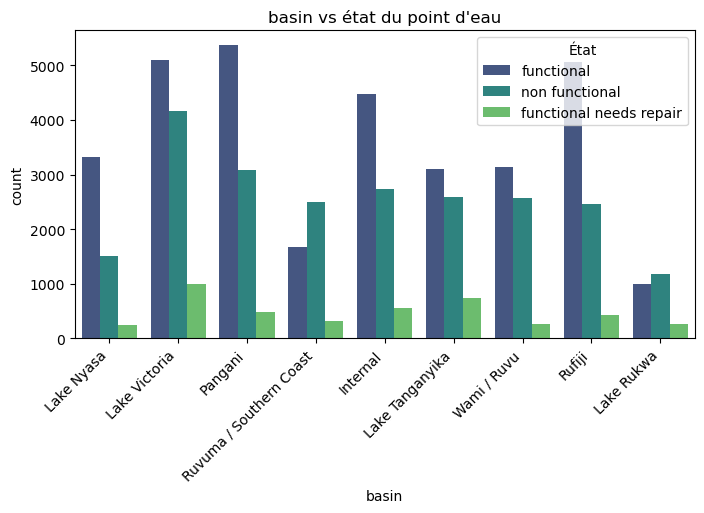

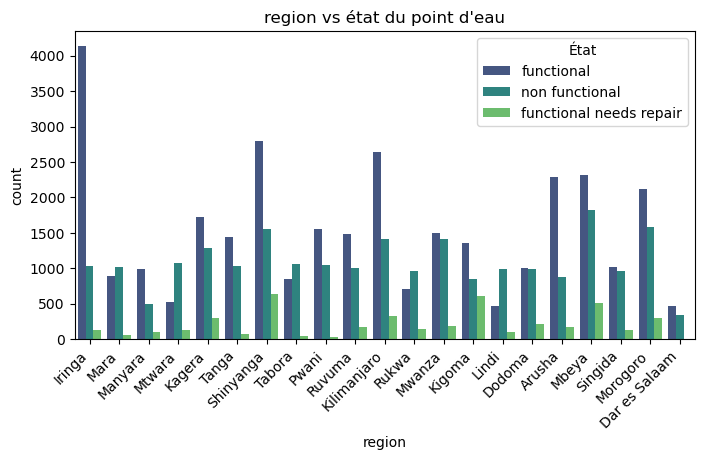

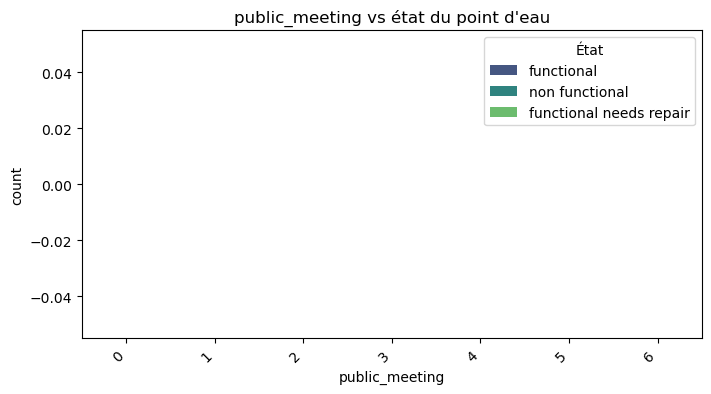

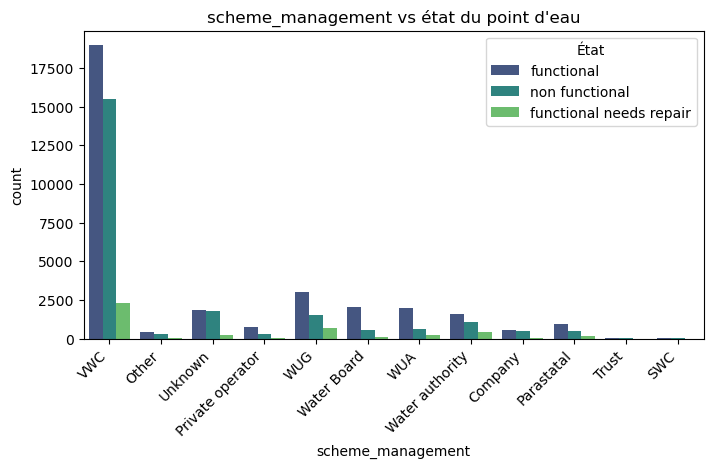

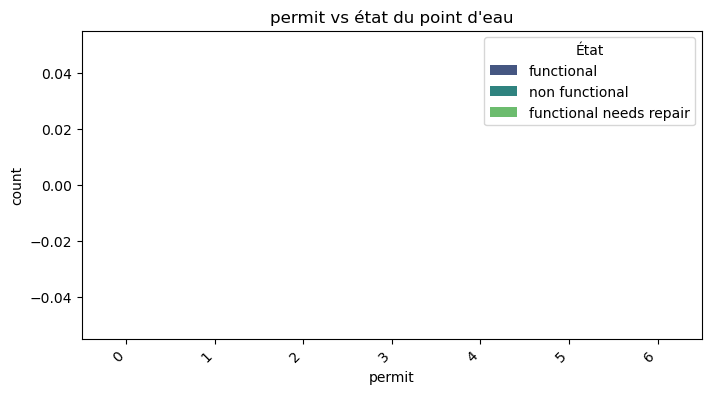

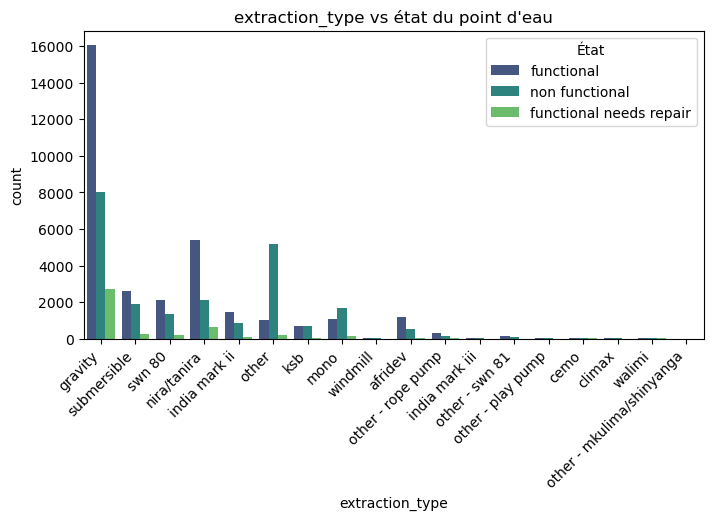

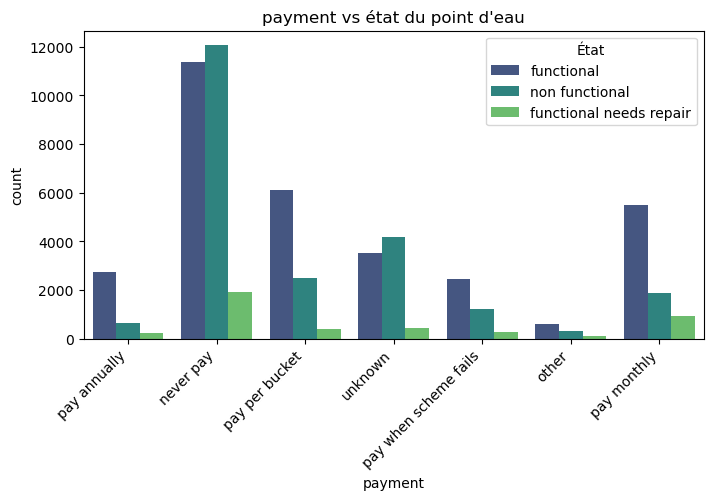

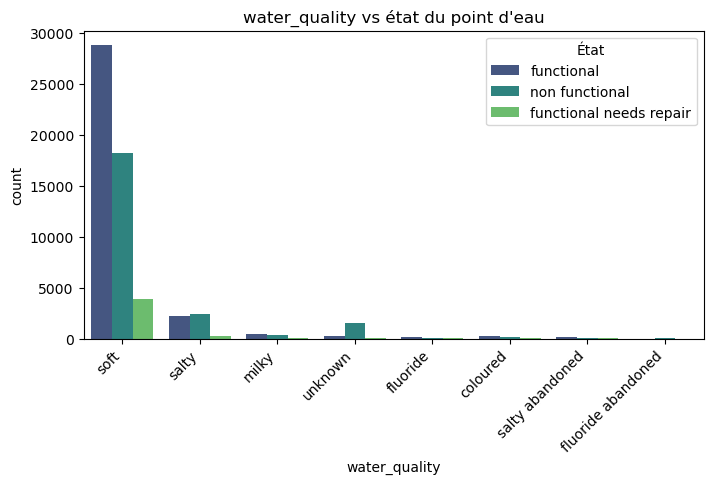

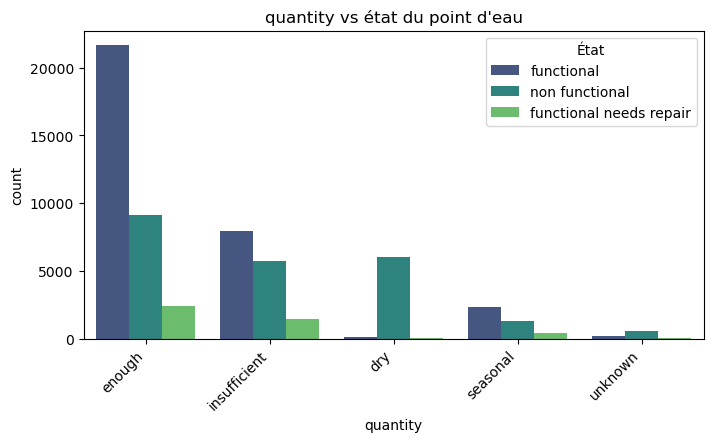

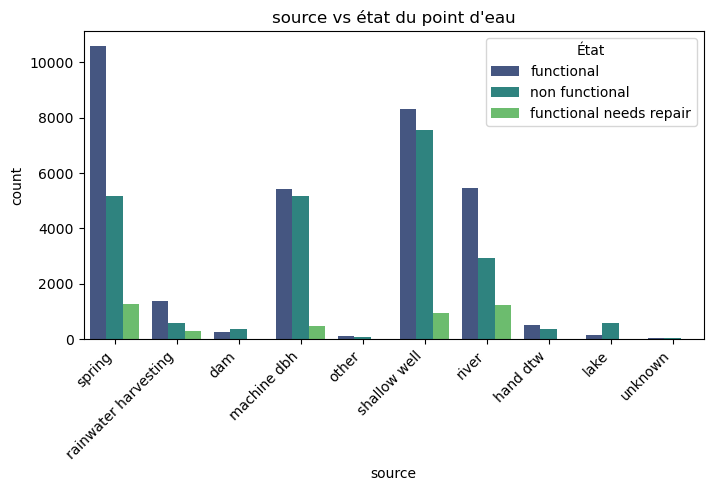

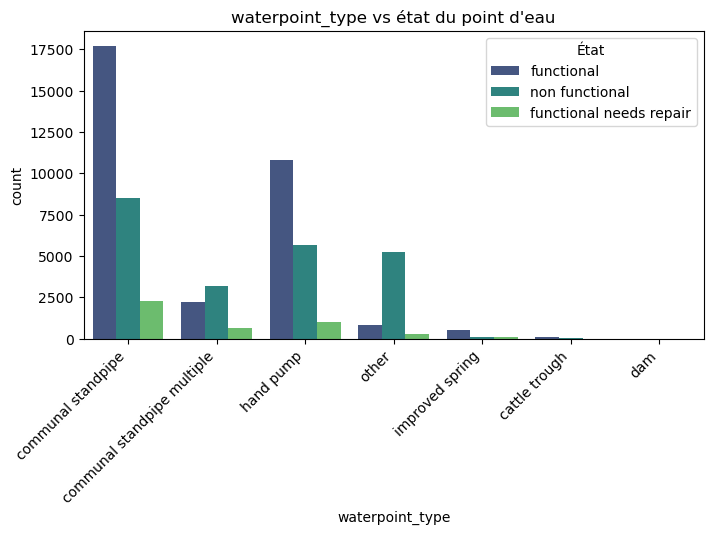

In [33]:
cat_vars = ["basin", "region",
            "public_meeting", "scheme_management", "permit",
            "extraction_type", "payment", "water_quality",
            "quantity", "source", "waterpoint_type"]

for col in cat_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_Select, x=col, hue="status_group", palette="viridis")
    plt.title(f"{col} vs √©tat du point d'eau")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="√âtat")
    plt.show()

## comment
## Quantity vs √©tat du point d'eau
Le graphe est un diagramme en barres empil√©es montrant, pour chaque cat√©gorie d‚Äô√©tat, le nombre total d‚Äôexemplaires observ√©s.
On compare rapidement la fr√©quence des puits dans chaque √©tat et la r√©partition par √©tat.

Le plus grand nombre d‚Äôobservations se trouve dans les √©tats "enough" et "insufficient" avec une dominance du statut "functional".
Les √©tats "dry" et "seasonal" ont des effectifs plus faibles, mais montrent encore une r√©partition entre les √©tats.
Le statut "functional needs repair" est g√©n√©ralement le moins fr√©quent, mais pas absent (pr√©sence dans plusieurs cat√©gories).

## extraction_type

Certains types d‚Äôextraction dominent en nombre total (par exemple, gravity et submersible semblent avoir beaucoup d‚Äôobservations).
Dans plusieurs cat√©gories, le puits est majoritairement en √©tat functional (bleu fonc√©).
Des cat√©gories pr√©sentent une proportion non n√©gligeable de puits non functional (teal) et/ou functional needs repair (vert).
Certaines cat√©gories affichent tr√®s peu d‚Äôobservations pour tous les √©tats, indiquant une faible fr√©quence dans l‚Äô√©chantillon.

## Waterpoint_type
L'analyse de la relation entre le type de point d'eau (waterpoint_type) et son √©tat de fonctionnement r√©v√®le une corr√©lation forte et d√©terminante, ce qui en fait un facteur pr√©dictif cl√© pour le mod√®le de machine learning.
La variable waterpoint_type s'annonce comme l'une des features les plus importantes pour pr√©dire l'√©tat d'un point d'eau.


## Modelisation

## Mod√®le Lineaire (Logistic Regression)

In [34]:
# Mod√®le
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    n_jobs=-1
)

# Entra√Ænement
log_reg.fit(X_train_transformed, y_train_encoded)

LogisticRegression(max_iter=500, multi_class='multinomial', n_jobs=-1)

## Pr√©diction

In [35]:
y_train_pred = log_reg.predict(X_train_transformed)

## √âvaluation 
accuracy, rapport de classification et matrice de confusion

In [36]:
# Accuracy
train_acc = accuracy_score(y_train_encoded, y_train_pred)
print("Accuracy (train):", train_acc)

# Rapport d√©taill√©
print("\nClassification Report:\n")
print(classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_))

# Matrice de confusion
cm = confusion_matrix(y_train_encoded, y_train_pred)

Accuracy (train): 0.8473400673400674

Classification Report:

                         precision    recall  f1-score   support

             functional       0.83      0.94      0.88     32259
functional needs repair       0.79      0.35      0.49      4317
         non functional       0.88      0.82      0.85     22824

               accuracy                           0.85     59400
              macro avg       0.83      0.70      0.74     59400
           weighted avg       0.85      0.85      0.84     59400



## Matrice de confusion (heatmap)


Matrice de confusion :
 [[30201   238  1820]
 [ 2120  1525   672]
 [ 4053   165 18606]]


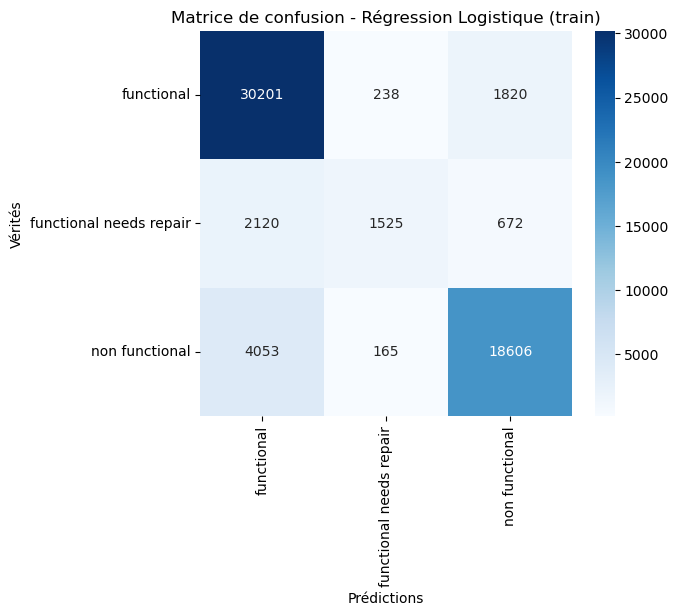

In [37]:
# Matrice de confusion (brut)
cm = confusion_matrix(y_train_encoded, y_train_pred)
print("\nMatrice de confusion :\n", cm)

# Matrice de confusion (heatmap)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Matrice de confusion - R√©gression Logistique (train)")
plt.xlabel("Pr√©dictions")
plt.ylabel("V√©rit√©s")
plt.show()

## Courbes ROC par classe

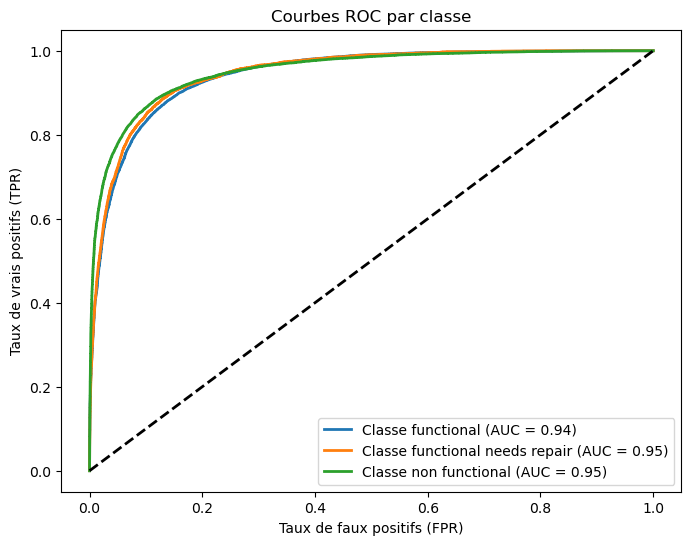

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Binarisation des classes pour le calcul des ROC
y_bin = label_binarize(y_train_encoded, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Probabilit√©s pr√©dites
y_score = log_reg.predict_proba(X_train_transformed)

# Courbes ROC
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Classe {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

# Diagonale al√©atoire
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC par classe")
plt.legend(loc="lower right")
plt.show()

## Courbes Precision-Recall par classe

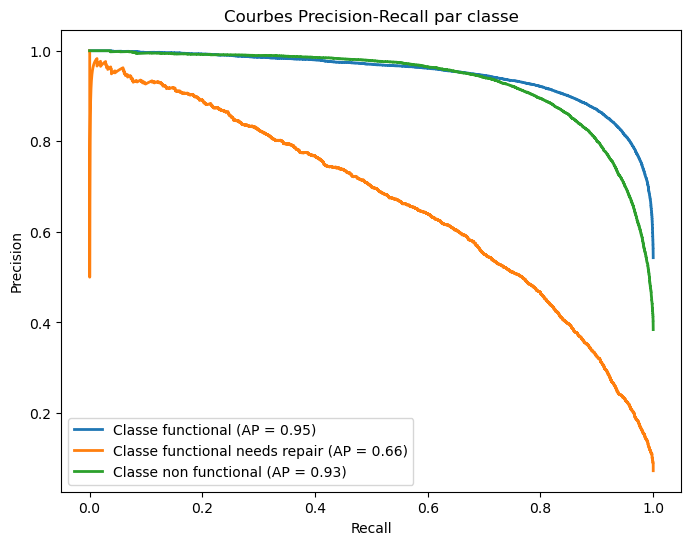

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Classe {label_encoder.classes_[i]} (AP = {ap:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Courbes Precision-Recall par classe")
plt.legend(loc="best")
plt.show()

Classe 'functional' (AP = 0.95) et 'non functional' (AP = 0.93) : Performance Excellente

Interpr√©tation : Pour ces deux classes majoritaires, le mod√®le est √† la fois fiable (haute pr√©cision) et complet (haut rappel). C'est le r√©sultat id√©al.

2. Classe 'functional needs repair' (AP = 0.66) : Performance Correcte mais Probl√©matique

Interpr√©tation : La performance pour cette classe est significativement plus faible. Regardez sa courbe : elle chute rapidement. 

## Distribution des probabilit√©s pr√©dites

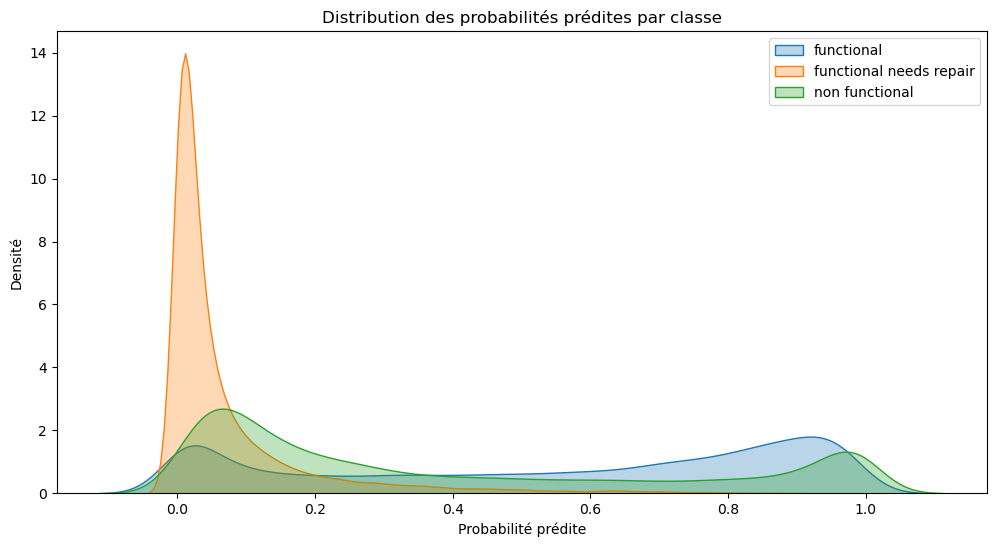

In [40]:
# Probabilit√©s pr√©dites
y_proba = log_reg.predict_proba(X_train_transformed)

plt.figure(figsize=(12, 6))

for i, class_name in enumerate(label_encoder.classes_):
    sns.kdeplot(y_proba[:, i], label=f"{class_name}", fill=True, alpha=0.3)

plt.title("Distribution des probabilit√©s pr√©dites par classe")
plt.xlabel("Probabilit√© pr√©dite")
plt.ylabel("Densit√©")
plt.legend()
plt.show()

## Comment
Ce graphique montre comment le mod√®le attribue les probabilit√©s pour chaque classe.

Excellente Confiance pour les Classes "functional" et "non functional" :

Les distributions pour functional (en bleu) et non functional (en vert) sont fortement concentr√©es vers 0 et 1.

Cela signifie que pour la grande majorit√© des pompes, le mod√®le est tr√®s confiant : il est s√ªr qu'elles sont soit fonctionnelles, soit non fonctionnelles. C'est le signe d'un mod√®le qui fait bien son travail de distinction entre ces deux √©tats.

Faible Confiance et Ambigu√Øt√© pour la Classe "functional needs repair" :

La distribution pour functional needs repair (en orange) est concentr√©e au centre, autour de 0.2-0.4.

Le mod√®le n'est jamais tr√®s s√ªr qu'une pompe entre dans cette cat√©gorie. Cela confirme parfaitement le faible score AP (0.66) observ√© pr√©c√©demment. La classe "needs repair" est intrins√®quement ambigu√´ et partage des caract√©ristiques avec les deux autres classes, ce qui rend sa pr√©diction difficile.

## Importance des features (coefficients de la r√©gression logistique)

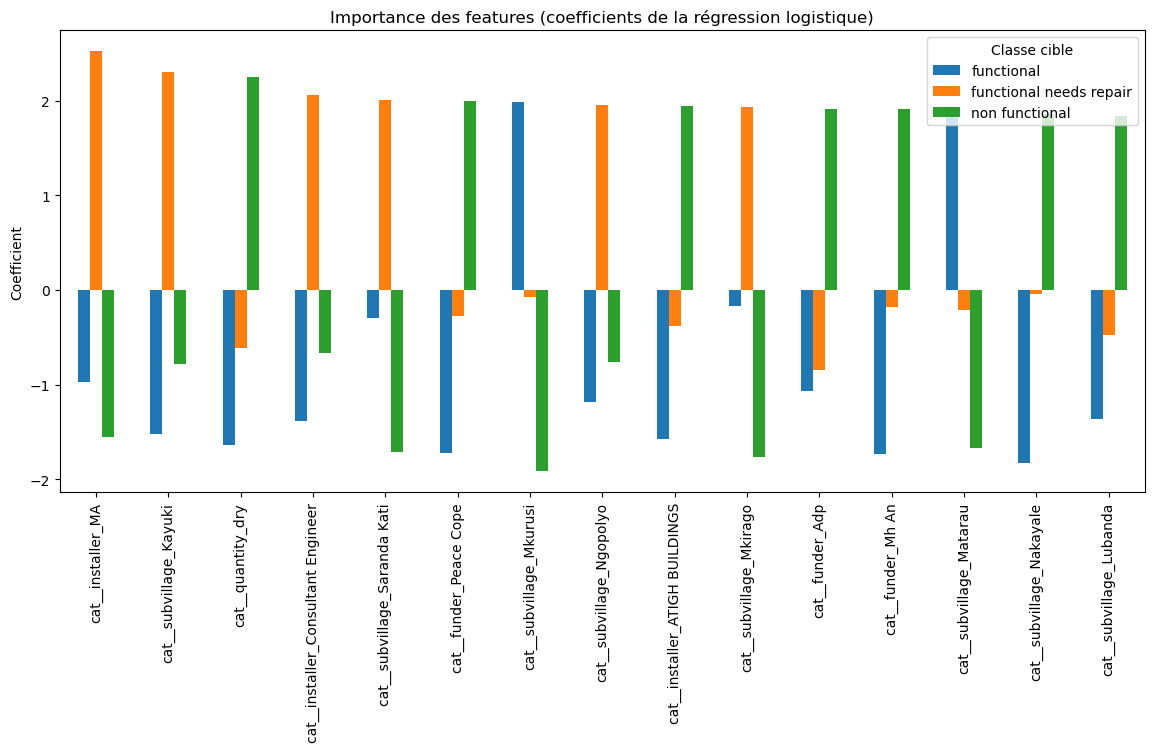

In [41]:
# R√©cup√©ration des coefficients
coeffs = log_reg.coef_
classes = label_encoder.classes_

# Colonnes (features encod√©es)
feature_names = preprocessor.get_feature_names_out()

# Conversion en DataFrame
coef_df = pd.DataFrame(coeffs.T, columns=classes, index=feature_names)

# S√©lection des 15 features les plus importantes (en valeur absolue)
top_features = coef_df.abs().sum(axis=1).sort_values(ascending=False).head(15).index
coef_top = coef_df.loc[top_features]

# Affichage graphique
coef_top.plot(kind="bar", figsize=(14, 6))
plt.title("Importance des features (coefficients de la r√©gression logistique)")
plt.ylabel("Coefficient")
plt.xticks(rotation=90)
plt.legend(title="Classe cible")
plt.show()

## Commentaire des r√©sultats ‚Äì R√©gression Logistique

Performance globale

Le mod√®le atteint une accuracy de 84,7 %, ce qui est globalement satisfaisant pour une premi√®re mod√©lisation.

La moyenne pond√©r√©e des F1-scores est de 0,84, confirmant un bon √©quilibre global, mais des disparit√©s apparaissent selon les classes.

Analyse par classe

Functional : tr√®s bien pr√©dite (Pr√©cision 0,83, Recall 0,94).
‚Üí Le mod√®le r√©ussit √† identifier correctement la majorit√© des points fonctionnels, avec peu de faux n√©gatifs.

Non functional : bonnes performances √©galement (Pr√©cision 0,88, Recall 0,82).
‚Üí Le mod√®le parvient √† bien capturer cette classe, mais confond encore environ 18 % des cas.

Functional needs repair : la classe la plus probl√©matique (Pr√©cision 0,79 mais Recall seulement 0,35).
‚Üí Cela montre que le mod√®le a du mal √† reconna√Ætre cette cat√©gorie interm√©diaire. Beaucoup de points ¬´ needs repair ¬ª sont confondus avec functional ou non functional.

Matrice de confusion

Functional (30201 correctement pr√©dits, 2058 mal class√©s) : taux de r√©ussite √©lev√©.

Functional needs repair (1525 bien class√©s sur 4317) : faible taux de d√©tection, la majorit√© est r√©partie dans les autres classes.

Non functional (18606 bien class√©s sur 22824) : bonne reconnaissance, mais encore plus de 4000 erreurs de classement vers la classe functional.

Conclusion

La r√©gression logistique est efficace pour distinguer functional et non functional, mais √©choue sur la classe minoritaire ¬´ needs repair ¬ª.

Cela est probablement d√ª √† :

la faible proportion de cette classe (‚âà7 %) dans les donn√©es,

la proximit√© des caract√©ristiques entre un puits l√©g√®rement endommag√© et un puits en bon √©tat ou hors service.

## Amelioration du modele

## Logistic Regression avec class_weight="balanced"

In [42]:
# Nouveau mod√®le
log_reg_balanced = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    class_weight="balanced",
    random_state=42
)

# Entra√Ænement
log_reg_balanced.fit(X_train_transformed, y_train_encoded)

# Pr√©dictions
y_train_pred_balanced = log_reg_balanced.predict(X_train_transformed)

# Accuracy
acc_balanced = accuracy_score(y_train_encoded, y_train_pred_balanced)
print("Accuracy (train, balanced):", acc_balanced)

# Rapport de classification
print("\nClassification Report (balanced):\n")
print(classification_report(y_train_encoded, y_train_pred_balanced, target_names=label_encoder.classes_))

# Matrice de confusion
cm_balanced = confusion_matrix(y_train_encoded, y_train_pred_balanced)
print("\nMatrice de confusion (balanced):\n", cm_balanced)

Accuracy (train, balanced): 0.814983164983165

Classification Report (balanced):

                         precision    recall  f1-score   support

             functional       0.90      0.80      0.85     32259
functional needs repair       0.43      0.94      0.59      4317
         non functional       0.87      0.81      0.84     22824

               accuracy                           0.81     59400
              macro avg       0.73      0.85      0.76     59400
           weighted avg       0.85      0.81      0.83     59400


Matrice de confusion (balanced):
 [[25916  3752  2591]
 [  148  4064   105]
 [ 2812  1582 18430]]


## Comment:
R√©sultats apr√®s (avec balanced)

Accuracy globale : baisse √† ~0.81 (normal, car on sacrifie un peu de pr√©cision sur les classes majoritaires).

Functional : Recall diminue (0.80 vs 0.94), mais reste correct.

Non functional : Recall stable (0.81).

Functional needs repair : Recall explose (0.94 vs 0.35 üöÄ) ‚Üí la classe minoritaire est enfin bien reconnue.

F1-score passe de 0.49 √† 0.59, une am√©lioration significative.

## Matrice de confusion interpr√©t√©e
Avant : les functional needs repair √©taient presque toujours mal class√©s.

Maintenant : on en d√©tecte presque tous (Recall 94%), mais au prix de plus d‚Äôerreurs entre functional ‚Üî needs repair.




## functional needs repair

Recall : √©norme gain ‚Üí de 0.35 √† 0.94 

Precision : chute ‚Üí de 0.79 √† 0.43 

Ce que √ßa veut dire :

Le mod√®le rep√®re presque tous les points d‚Äôeau qui n√©cessitent une r√©paration (haut rappel).

Mais il confond beaucoup d‚Äôautres cas avec cette classe ‚Üí d‚Äôo√π la baisse de pr√©cision.

En d‚Äôautres termes :

Sans balanced ‚Üí peu de vrais cas d√©tect√©s, mais assez fiables (pr√©cision haute).

Avec balanced ‚Üí beaucoup de cas d√©tect√©s (recall √©norme), mais beaucoup de faux positifs (pr√©cision faible).

In [43]:
# Mod√®le Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",  # important √† cause du d√©s√©quilibre
    random_state=42,
    n_jobs=-1
)

# Entra√Ænement
rf_model.fit(X_train_transformed, y_train_encoded)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [44]:
y_pred_train_rf = rf_model.predict(X_train_transformed)
y_pred_test_rf = rf_model.predict(X_test_transformed)

# Inverser l'encodage pour r√©cup√©rer les labels textuels
y_pred_train_labels = label_encoder.inverse_transform(y_pred_train_rf)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test_rf)

In [45]:
# ---- Accuracy
acc_rf = accuracy_score(y_train_encoded, y_pred_train_rf)
print(f"Accuracy (train, RF): {acc_rf:.4f}\n")

# ---- Classification report
print("Classification Report (Random Forest):\n")
print(classification_report(
    y_train_encoded, 
    y_pred_train_rf, 
    target_names=label_encoder.classes_
))

# ---- Matrice de confusion
cm_rf = confusion_matrix(y_train_encoded, y_pred_train_rf)
print("Matrice de confusion (RF):\n", cm_rf)


Accuracy (train, RF): 0.9996

Classification Report (Random Forest):

                         precision    recall  f1-score   support

             functional       1.00      1.00      1.00     32259
functional needs repair       1.00      1.00      1.00      4317
         non functional       1.00      1.00      1.00     22824

               accuracy                           1.00     59400
              macro avg       1.00      1.00      1.00     59400
           weighted avg       1.00      1.00      1.00     59400

Matrice de confusion (RF):
 [[32238    17     4]
 [    0  4317     0]
 [    1     2 22821]]


## Commentaire sur les performances du mod√®le Random Forest

Observations principales :
Performance exceptionnelle en entra√Ænement :

Accuracy de 99.96% - le mod√®le apprend presque parfaitement les donn√©es d'entra√Ænement

Cette performance sugg√®re un potentiel overfitting (surapprentissage)

M√©triques parfaites sur toutes les classes :

Precision, recall et F1-score √† 1.00 pour les 3 classes

La matrice de confusion montre tr√®s peu d'erreurs (seulement 24 erreurs sur 59 400 √©chantillons)

## mod√©lisation (decision tree)

## D√©finir et entra√Æner l‚Äôarbre de d√©cision

In [46]:
# Initialiser le mod√®le
dt = DecisionTreeClassifier(max_depth=10, random_state=42)  # max_depth pour √©viter le sur-apprentissage

# Entra√Æner le mod√®le
dt.fit(X_train_transformed, y_train_encoded)

DecisionTreeClassifier(max_depth=10, random_state=42)

## Pr√©dictions

In [47]:
# ---- Pr√©diction sur les donn√©es de test (pas d'√©valuation car pas de y_test)
y_pred_test_dt = dt.predict(X_test_transformed)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test_dt)
y_pred_train_dt = dt.predict(X_train_transformed)

In [48]:
# Affichage des pr√©dictions
results = pd.DataFrame({
    "y_pred_test_dt": y_pred_test_dt
})

# Aper√ßu des 10 premi√®res lignes
results.head(20)

y_pred_test_dt
0                0
1                0
2                0
3                2
4                0
5                0
6                0
7                2
8                0
9                0
10               0
11               2
12               2
13               2
14               0
15               0
16               2
17               0
18               0
19               2

In [49]:
# 3. √âvaluation
print("Accuracy (train):", accuracy_score(y_train_encoded, y_pred_train_dt))

print("\nClassification report:\n", 
      classification_report(y_train_encoded, y_pred_train_dt, target_names=label_encoder.classes_))

cm_dt = confusion_matrix(y_train_encoded, y_pred_train_dt)
print("\nMatrice de confusion :\n", cm_dt)

Accuracy (train): 0.7619023569023569

Classification report:
                          precision    recall  f1-score   support

             functional       0.73      0.94      0.82     32259
functional needs repair       0.79      0.17      0.28      4317
         non functional       0.85      0.63      0.72     22824

               accuracy                           0.76     59400
              macro avg       0.79      0.58      0.61     59400
           weighted avg       0.78      0.76      0.74     59400


Matrice de confusion :
 [[30207   106  1946]
 [ 3001   722   594]
 [ 8411    85 14328]]


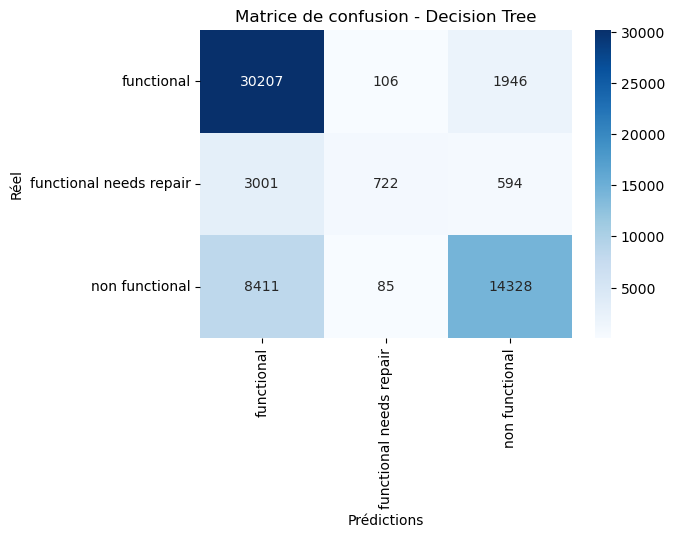

In [50]:
# heatmap matrice de confusion
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Pr√©dictions")
plt.ylabel("R√©el")
plt.title("Matrice de confusion - Decision Tree")
plt.show()

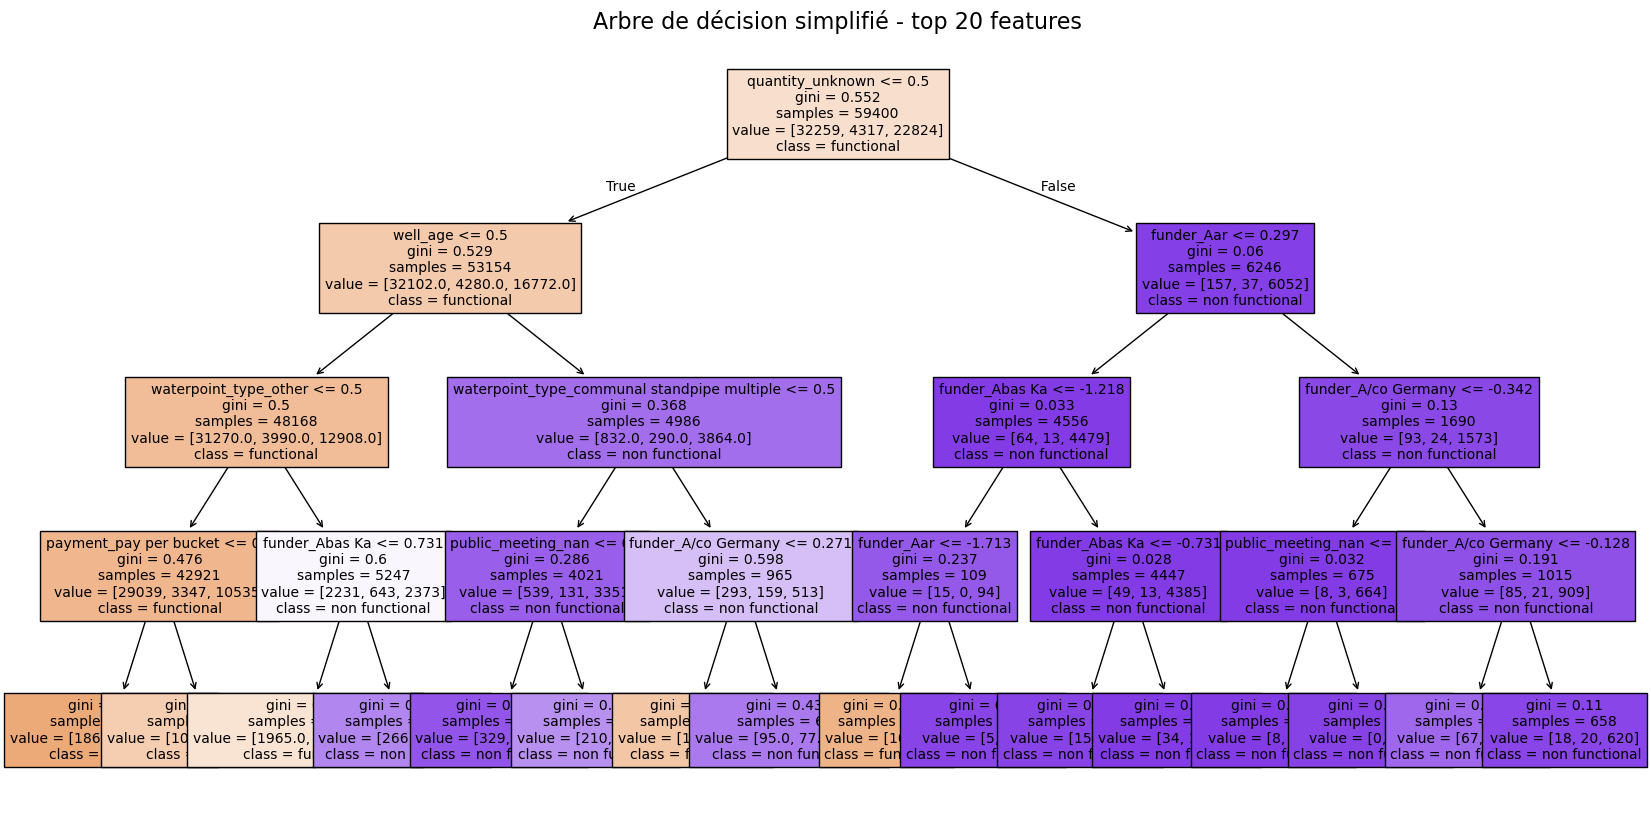

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


# R√©cup√©ration des noms de colonnes encod√©es
ohe = preprocessor.named_transformers_["cat"]  # OneHotEncoder
cat_features = preprocessor.transformers_[1][2]  # colonnes cat√©gorielles
num_features = preprocessor.transformers_[0][2]  # colonnes num√©riques

# Colonnes apr√®s OneHot
onehot_columns = ohe.get_feature_names_out(cat_features)
all_columns = list(onehot_columns) + num_features  # concat√©ner cat + num

# Importance des features (top 20)
indices = np.argsort(dt.feature_importances_)[-20:]
top_features = [all_columns[i] for i in indices]

# Sous-matrice r√©duite aux top features
X_train_small = X_train_transformed[:, indices]

# Petit arbre simplifi√©
dt_small = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_small.fit(X_train_small, y_train_encoded)

# Visualisation de l‚Äôarbre
plt.figure(figsize=(20,10))
plot_tree(
    dt_small,
    feature_names=top_features,
    class_names=label_encoder.classes_,
    filled=True,
    fontsize=10
)
plt.title("Arbre de d√©cision simplifi√© - top 20 features", fontsize=16)
plt.show()

## comment

## Accuracy (train) = 0.76

C‚Äôest moins bon que la r√©gression logistique (~0.81 avec class_weight=balanced) et le Random Forest (souvent autour de ~0.83‚Äì0.85).

Mais √ßa reste un score correct.

## Par classe (classification report)

Functional (majoritaire)

Recall = 0.94 ‚Üí l‚Äôarbre identifie tr√®s bien les pompes fonctionnelles (il d√©tecte presque toutes).

Pr√©cision = 0.73 ‚Üí mais il a beaucoup de faux positifs : il pr√©dit parfois "functional" alors que c‚Äô√©tait autre chose.

F1 = 0.82 ‚Üí tr√®s bon score.

Functional needs repair (minoritaire)

Recall = 0.17 ‚Üí √©norme probl√®me : le mod√®le ne capte quasiment jamais cette classe (il en loupe 83%).

Pr√©cision = 0.79 ‚Üí quand il dit "needs repair", c‚Äôest souvent correct.

F1 = 0.28 ‚Üí performance globale tr√®s faible, il n√©glige cette classe.

Non functional (seconde classe importante)

Recall = 0.63 ‚Üí l‚Äôarbre d√©tecte seulement 63% des pompes non fonctionnelles, il en rate 37%.

Pr√©cision = 0.85 ‚Üí mais quand il dit "non functional", c‚Äôest fiable.

F1 = 0.72 ‚Üí correct mais inf√©rieur √† "functional".

## Matrice de confusion

L‚Äôarbre bascule trop vers la classe majoritaire ("functional").

La classe "needs repair" est pratiquement sacrifi√©e ‚Üí tr√®s mauvais rappel.

Confusion importante entre functional et non functional.

## Comparaison des trois approches

## R√©gression logistique :

Bon compromis global avec une accuracy √©lev√©e (~0.85).

Distingue bien functional et non functional.

Faiblesses : la classe interm√©diaire functional needs repair reste mal capt√©e, car la fronti√®re lin√©aire ne suffit pas pour mod√©liser cette cat√©gorie plus ambigu√´.

## Arbre de d√©cision :

Plus interpr√©table, on peut visualiser facilement les r√®gles utilis√©es (par ex. gps_height, construction_year, funder).

Capture certaines relations non lin√©aires.

Faiblesses : performance plus faible (~0.76 accuracy) et tendance au sur-apprentissage si la profondeur n‚Äôest pas bien contr√¥l√©e.

## Random Forest :

Combine plusieurs arbres ‚Üí meilleure robustesse et meilleure capacit√© √† mod√©liser la complexit√©.

G√®re bien le d√©s√©quilibre entre classes gr√¢ce √† class_weight="balanced".

Offre souvent le meilleur √©quilibre pr√©cision/rappel, notamment pour la classe interm√©diaire, m√™me si l‚Äôinterpr√©tabilit√© diminue par rapport √† un seul arbre.

## RESUME :

La r√©gression logistique reste un mod√®le simple et efficace, rapide √† entra√Æner et interpr√©table.

L‚Äôarbre de d√©cision apporte surtout en termes de compr√©hension des r√®gles mais n‚Äôam√©liore pas la performance.

Le Random Forest se r√©v√®le √™tre le mod√®le le plus solide parmi les trois, en conciliant robustesse, meilleure capacit√© de g√©n√©ralisation et gestion du d√©s√©quilibre.

## $$\;\;\;\;\;\;\;\;\; Business Recommendation \;1$$

## Prioriser la maintenance pr√©ventive des puits "functional needs repair"

Nos mod√®les montrent que cette classe est la plus difficile √† pr√©dire correctement.

Cela traduit une zone grise op√©rationnelle : ces puits fonctionnent encore, mais avec un risque √©lev√© de panne.

Recommandation : mettre en place un programme de suivi r√©gulier (ex. inspections trimestrielles) pour ces puits afin de r√©duire leur transition vers la cat√©gorie non functional.

#### $$\;\;\;\;\;\;\;\;\; Business \;Recommendation \;2$$

## Utiliser les variables g√©ographiques et techniques pour cibler les interventions

Les variables comme gps_height, construction_year, et la localisation (region, basin) influencent fortement le statut des puits.

Certains contextes g√©ographiques pr√©sentent plus de non-functional wells.

Recommandation : orienter les investissements en maintenance et r√©habilitation vers les zones √† risque identifi√© par les mod√®les (ex. altitude basse, puits anciens).

#### $$\;\;\;\;\;\;\;\;\; Business\; Recommendation \;3$$

## Mettre en place un tableau de bord de suivi bas√© sur la pr√©diction

Le mod√®le Random Forest peut servir comme un outil d‚Äôaide √† la d√©cision.

Recommandation : cr√©er un dashboard op√©rationnel qui affiche :

Les puits class√©s par risque de panne,

Une alerte pr√©coce pour les puits √† surveiller,

Les priorit√©s d‚Äôallocation des ressources (techniciens, financements, pi√®ces de rechange).

## Conclusion

Conclusion

L‚Äôanalyse a montr√© que la r√©gression logistique offre les meilleures performances globales pour distinguer les puits fonctionnels et non fonctionnels, tout en restant robuste et g√©n√©ralisable.
L‚Äôarbre de d√©cision apporte une bonne interpr√©tabilit√© mais souffre de surapprentissage, tandis que la random forest am√©liore l√©g√®rement la pr√©cision gr√¢ce √† son approche ensembliste, au prix d‚Äôune complexit√© plus √©lev√©e.

Dans le cadre de ce projet, nous retenons la r√©gression logistique avec pond√©ration des classes comme m√©thode principale, car elle combine une bonne performance globale, une relative simplicit√© de mise en ≈ìuvre et une interpr√©tation claire des r√©sultats.